## Egocentric agent learning

Here the agent must combine information from what it gathers from observation and action to solve the task.

Its action space is 'ego centric' thus it must also learn how to make use of the information it gathers. 

## Imports and setup

In [1]:
%matplotlib inline
import os
import incense
from incense import ExperimentLoader
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd

#name is main_visual

def get_mongo_uri():
    in_devcontainer = os.environ.get("TERM_PROGRAM") == "vscode"
    if in_devcontainer:
        return "mongodb://mongo:27017"
    else:
        return None
    
loader = ExperimentLoader(mongo_uri=get_mongo_uri(), db_name='sacred')

## Load experiments

In [7]:
# Sort by name

query = {"$and": [{"config.env": "steplights"}, {"config.dev": True}, {"config.name": "main_ego"}]}
steplights_set = loader.find(query)

#query = {"$and": [{"config.env": "pushbutton"}, {"config.dev": True}, {"config.name": "main_ego"}]}
#pushbutton_set = loader.find(query)

#query = {"$and": [{"config.env": "pushbox"}, {"config.dev": True}, {"config.name": "main_ego"}]}
#pushbox_set = loader.find(query)

In [5]:
T = int(simple_example_confounded_set[0].config.epochs/50)-1
mean_reward_conf = np.zeros((len(simple_example_confounded_set), T))
for idx,exp in enumerate(simple_example_confounded_set):
    mean_reward_conf[idx] = exp.metrics['training.mean_reward']

IndexError: list index out of range

In [8]:
steplights_set

QuerySet([Experiment(id=168, name=main_ego), Experiment(id=169, name=main_ego), Experiment(id=171, name=main_ego), Experiment(id=172, name=main_ego), Experiment(id=173, name=main_ego), Experiment(id=174, name=main_ego), Experiment(id=175, name=main_ego), Experiment(id=177, name=main_ego), Experiment(id=178, name=main_ego), Experiment(id=184, name=main_ego), Experiment(id=187, name=main_ego), Experiment(id=189, name=main_ego)])

In [15]:
#Get metrics
T = int(steplights_set[-1].config.epochs/1e4)-1

#mean_reward_conf = np.zeros((len(steplights_set), T))
#for idx,exp in enumerate(simple_example_confounded_set):
#    mean_reward_conf[idx] = exp.metrics['training.mean_reward']
    
#T = int(simple_example_obsint_set[0].config.epochs/50)
#mean_reward_obsint = np.zeros((len(simple_example_obsint_set), T))
#for idx,exp in enumerate(simple_example_obsint_set):
#    L = len(exp.metrics['training.mean_reward'])
#    mean_reward_obsint[idx,:L] = exp.metrics['training.mean_reward']
        
#T = int(simple_example_obs_set[0].config.epochs/50)
#mean_reward_obs = np.zeros((len(simple_example_obs_set), T))
#for idx,exp in enumerate(simple_example_obs_set):
#    L = len(exp.metrics['training.mean_reward'])
#    mean_reward_obs[idx,:L] = exp.metrics['training.mean_reward']

#T = int(simple_example_int_set[0].config.epochs/50)
#mean_reward_int = np.zeros((len(simple_example_int_set), T))
#for idx,exp in enumerate(simple_example_int_set):
#    L = len(exp.metrics['training.mean_reward'])
#    mean_reward_int[idx,:L] = exp.metrics['training.mean_reward']
   

In [16]:
T

99

Text(0.5, 1.0, 'Step lights task')

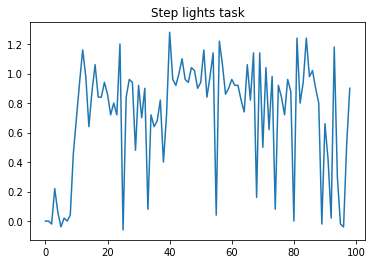

In [18]:
expt_reward = steplights_set[-1].metrics['training.mean_reward']
plt.plot(expt_reward)
plt.title('Step lights task')

## Restart analysis.... by deleting experiments

In [28]:
#exp = loader.find_by_id(2)
#exp.delete()

query = {"$and": [{"config.name": "simple_example_obsint",{"config.dev": False}}]}
simple_example_obsint_set = loader.find(query)
for exp in simple_example_obsint_set:
    exp.delete(confirmed=True)

query = {"$and": [{"config.name": "simple_example_obs"},{"config.dev": False}]}
simple_example_obs_set = loader.find(query)
for exp in simple_example_obs_set:
    exp.delete(confirmed=True)

query = {"$and": [{"config.name": "simple_example_confounded"}, {"config.dev": False}]}
simple_example_confounded_set = loader.find(query)
for exp in simple_example_confounded_set:
    exp.delete(confirmed=True)

query = {"$and": [{"config.name": "simple_example_int",{"config.dev": False}}]}
simple_example_int_set = loader.find(query)
for exp in simple_example_int_set:
    exp.delete(confirmed=True)

